In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


Comparing the distributions

In [2]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv', index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv', index_col=0)

In [3]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [4]:
#np.matrix(classI).flatten().tolist()[0]
classI_values = get_values_from_df(classI)
classII_values = get_values_from_df(classII)

In [5]:
df = pd.DataFrame({'ClassI': classI_values, 'ClassII': classII_values})

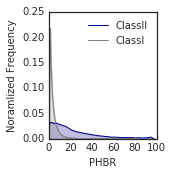

In [6]:
plt.figure(figsize=(2.5, 2.5))
sns.kdeplot(df.ClassII, shade=True, color='darkblue')
sns.kdeplot(df.ClassI, shade=True, color='grey')
plt.xlim(0, 100)
plt.ylim(0, 0.25)
plt.legend(loc=1, prop={'size': 10})
plt.xlabel('PHBR')
plt.ylabel('Noramlized Frequency')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/overview.conservative.pdf')

In [41]:
df.head()

,ClassI,ClassII
0,3.939069,57.391304
1,6.716660,26.526316
2,7.748003,27.692308
3,1.788195,15.529412
4,12.295623,30.545455


In [43]:
df['ClassI_log'] = df.ClassI.apply(np.log)
df['ClassII_log'] = df.ClassII.apply(np.log)

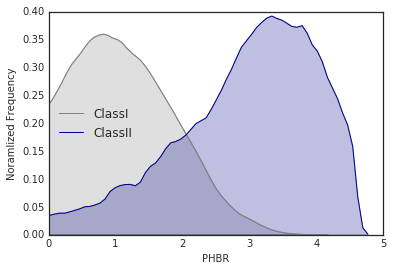

In [47]:
sns.kdeplot(df.ClassI_log, shade=True, color='grey')
sns.kdeplot(df.ClassII_log, shade=True, color='darkblue')
plt.xlim(0, 5)
plt.xlabel('PHBR')
plt.ylabel('Noramlized Frequency')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/overview.log.pdf')

Density plot for MHC-I and MHC-II

In [3]:
mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv', index_col=0)
thresholded_mutations = list(mutations.sum()[mutations.sum() > 5].index)
classI_thresh = classI[thresholded_mutations]
classII_thresh = classII[thresholded_mutations]

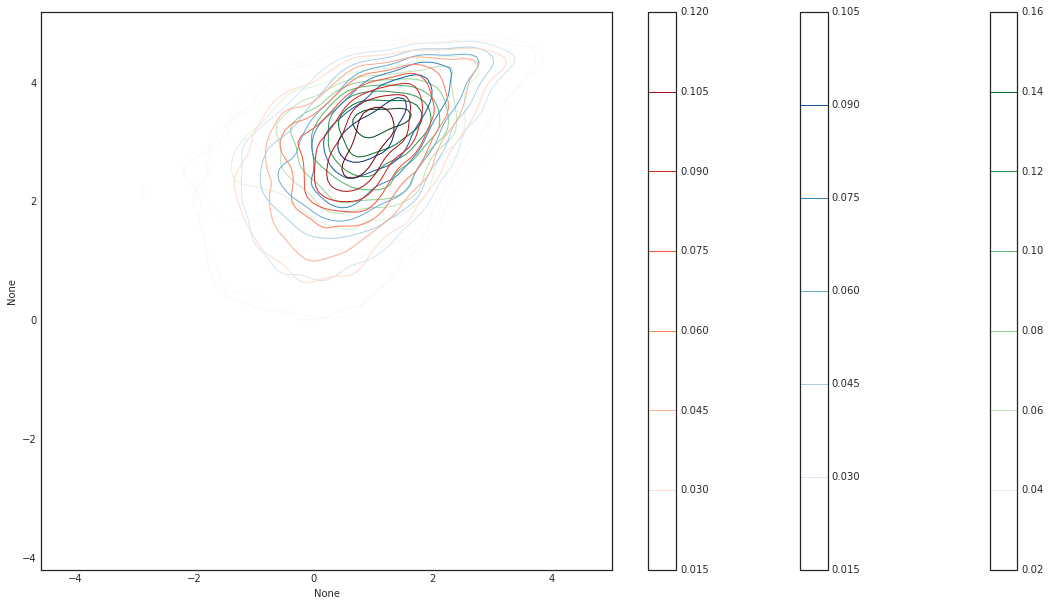

In [37]:
# Cancer
classI_values = pd.Series(np.matrix(classI_thresh).flatten().tolist()[0])
classII_values = pd.Series(np.matrix(classII_thresh).flatten().tolist()[0])
len(classI_values), len(classII_values)
random_indices = np.random.choice(len(classII_values), 10000)
classI_logvalues = np.log(classI_values)
classII_logvalues = np.log(classII_values)
plt.figure(figsize=(20,10))
sns.kdeplot(pd.Series(classI_logvalues[random_indices]), pd.Series(classII_logvalues[random_indices]), 
              cmap="Greens",  shade_lowest=False, cbar=True)
plt.ylabel('MHC-II PHBR')
plt.xlabel('MHC-I PHBR')

# Germline
classI_germ = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_i.csv', index_col=0)
classII_germ = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_ii.csv', index_col=0)
classI_values = pd.Series(np.matrix(classI_germ).flatten().tolist()[0])
classII_values = pd.Series(np.matrix(classII_germ).flatten().tolist()[0])
len(classI_values), len(classII_values)
random_indices = np.random.choice(len(classII_values), 10000)
classI_logvalues = np.log(classI_values)
classII_logvalues = np.log(classII_values)
sns.kdeplot(pd.Series(classI_logvalues[random_indices]), pd.Series(classII_logvalues[random_indices]), 
              cmap="Blues", shade_lowest=False, cbar=True)

# Passenger
classI_pass = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_i.csv', index_col=0)
classII_pass = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_ii.csv', index_col=0)
classI_values = pd.Series(np.matrix(classI_pass).flatten().tolist()[0])
classII_values = pd.Series(np.matrix(classII_pass).flatten().tolist()[0])
len(classI_values), len(classII_values)
random_indices = np.random.choice(len(classII_values), 10000)
classI_logvalues = np.log(classI_values)
classII_logvalues = np.log(classII_values)
sns.kdeplot(pd.Series(classI_logvalues[random_indices]), pd.Series(classII_logvalues[random_indices]), 
              cmap="Reds", shade_lowest=False, cbar=True)

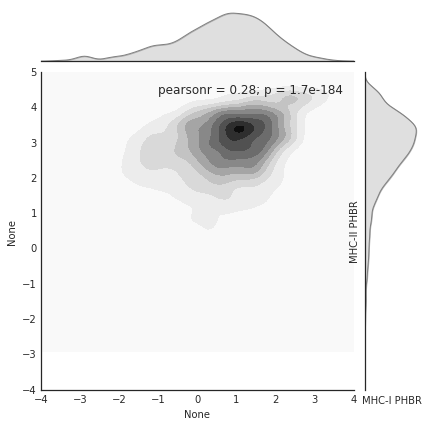

In [7]:
# Cancer
classI_values = pd.Series(np.matrix(classI_thresh).flatten().tolist()[0])
classII_values = pd.Series(np.matrix(classII_thresh).flatten().tolist()[0])
len(classI_values), len(classII_values)
random_indices = np.random.choice(len(classII_values), 10000)
classI_logvalues = np.log(classI_values)
classII_logvalues = np.log(classII_values)
plt.figure(figsize=(10,10))
sns.jointplot(pd.Series(classI_logvalues[random_indices]), pd.Series(classII_logvalues[random_indices]), 
              cmap="Greys", kind='kde', xlim=(-4,4), ylim=(-4,5), color='grey')
plt.ylabel('MHC-II PHBR')
plt.xlabel('MHC-I PHBR')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/matched_models/density.cancer.pdf')

Germline

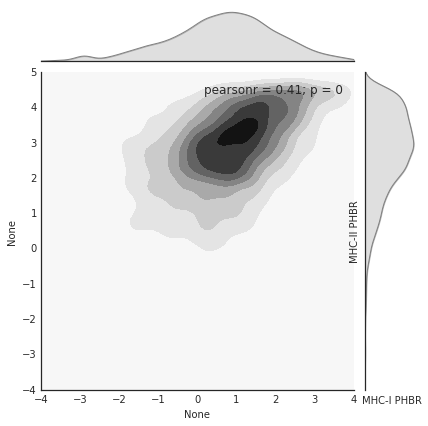

In [8]:
classI_germ = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_i.csv', index_col=0)
classII_germ = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_ii.csv', index_col=0)
classI_values = pd.Series(np.matrix(classI_germ).flatten().tolist()[0])
classII_values = pd.Series(np.matrix(classII_germ).flatten().tolist()[0])
len(classI_values), len(classII_values)
random_indices = np.random.choice(len(classII_values), 10000)
classI_logvalues = np.log(classI_values)
classII_logvalues = np.log(classII_values)
plt.figure(figsize=(10,10))

sns.jointplot(pd.Series(classI_logvalues[random_indices]), pd.Series(classII_logvalues[random_indices]), 
              cmap="Greys", kind='kde', xlim=(-4,4), ylim=(-4,5), color='grey')
plt.ylabel('MHC-II PHBR')
plt.xlabel('MHC-I PHBR')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/matched_models/density.germline.pdf')

Passenger

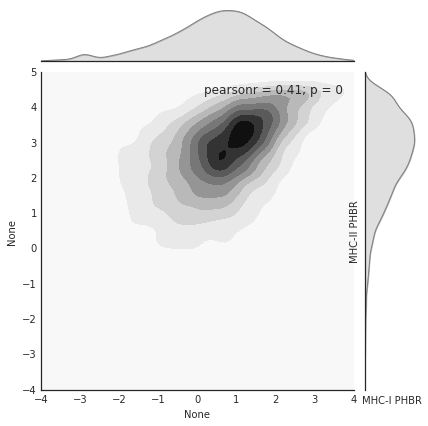

In [9]:
classI_pass = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_i.csv', index_col=0)
classII_pass = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_ii.csv', index_col=0)
classI_values = pd.Series(np.matrix(classI_pass).flatten().tolist()[0])
classII_values = pd.Series(np.matrix(classII_pass).flatten().tolist()[0])
len(classI_values), len(classII_values)
random_indices = np.random.choice(len(classII_values), 10000)
classI_logvalues = np.log(classI_values)
classII_logvalues = np.log(classII_values)
plt.figure(figsize=(10,10))
sns.jointplot(pd.Series(classI_logvalues[random_indices]), pd.Series(classII_logvalues[random_indices]), 
              cmap="Greys", kind='kde', xlim=(-4,4), ylim=(-4,5), color='grey')
plt.ylabel('MHC-II PHBR')
plt.xlabel('MHC-I PHBR')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/matched_models/density.passenger.pdf')

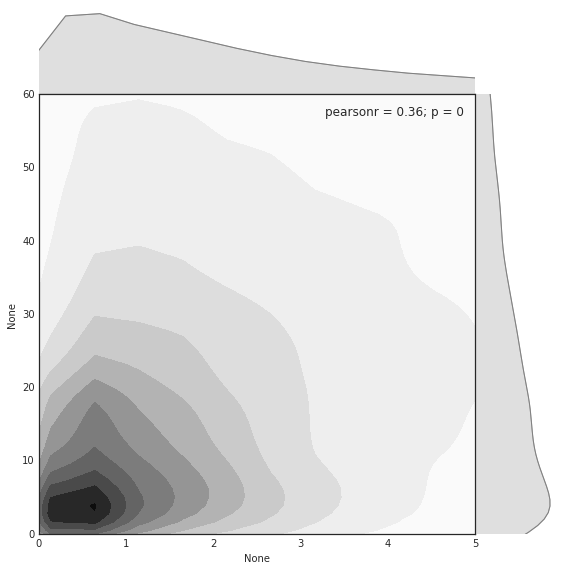

In [70]:
sns.jointplot(classI_values[random_indices], classII_values[random_indices], kind='kde', xlim=(0,5), ylim=(0, 60), 
              cmap="Greys", size=8, space=0, color='grey')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/matched_models/density.pdf')

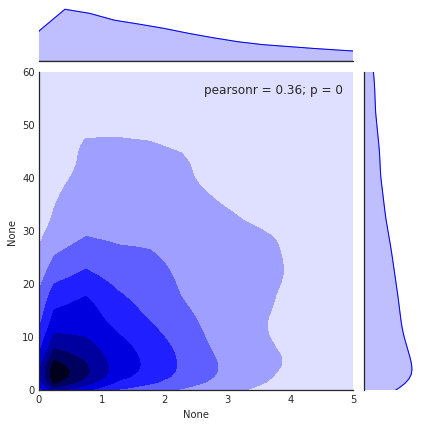

In [46]:
sns.jointplot(classI_values[:50000], classII_values[:50000], kind='hex', xlim=(0,5), ylim=(0, 60))

## Odds ratios

In [5]:
mhci = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/matched_models/tissues.5mut.class_i.txt', sep=' ')
mhcii = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/matched_models/tissues.5mut.class_ii.txt', sep=' ')

In [11]:
df = pd.merge(pd.DataFrame(mhci['OR']), pd.DataFrame(mhcii['OR']), left_index=True, right_index=True)
df.columns = ['MHC-I', 'MHC-II']

In [38]:
df

,MHC-I,MHC-II
MESO,1.211464,5.169625
BRCA,1.183193,0.916213
UCS,1.219796,0.816026
LUSC,0.937667,0.991295
GBM,1.454519,1.289676
READ,1.452945,1.359694
KICH,1.577671,1.595745
COAD,1.478471,1.360256
SKCM,1.362143,1.633643
STAD,1.073599,1.126172


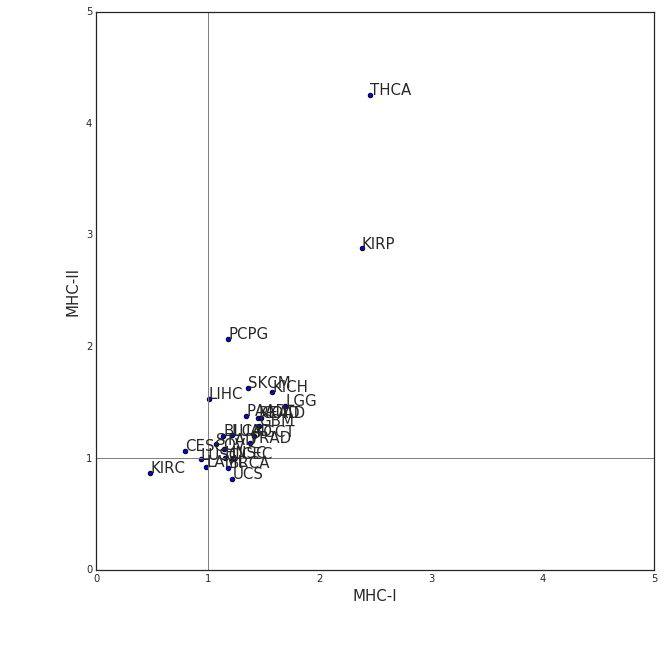

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axhline(y=1, xmin=0, xmax=3.5, color='grey')
ax.axvline(x=1, ymin=0, ymax=3.5, color='grey')
ax.scatter(df['MHC-I'], df['MHC-II'])
plt.xlabel('MHC-I', size=15)
plt.ylabel('MHC-II', size=15)
plt.ylim(0, 5)
plt.xlim(0, 5)
#ax.gca().set_aspect('equal', adjustable='box')
for i, txt in enumerate(df.index):
    ax.annotate(txt, (df['MHC-I'][i],df['MHC-II'][i]), size=15)
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/OR_comparison.pdf')